## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].unique())
print("Total number of mice: " + str(total_mice))

Total number of mice: 249


In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 



In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice in the clean DataFrame.
new_mice_total = len(clean_data_df['Mouse ID'].unique())
new_mice_total

249

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regi_mean = clean_data_df.groupby('Drug Regimen').mean()
regimean = regi_mean['Tumor Volume (mm3)']
regimean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [48]:
regi_median = clean_data_df.groupby('Drug Regimen').median()
regimedian = regi_median['Tumor Volume (mm3)']
regimedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [49]:
regi_var = clean_data_df.groupby('Drug Regimen').var()
regivar = regi_var['Tumor Volume (mm3)']
regivar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [50]:
regi_sd = clean_data_df.groupby('Drug Regimen').std()
regisd = regi_sd['Tumor Volume (mm3)']
regisd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [51]:
regi_sem = clean_data_df.groupby('Drug Regimen').sem()
regisem = regi_sem['Tumor Volume (mm3)']
regisem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [52]:
# Assemble the resulting series into a single summary dataframe.
describe_summary_df = pd.DataFrame({
    'Tumor Volume Mean': regimean,
    'Tumor Volume Median': regimedian,
    'Tumor Volume Variance': regivar,
    'Tumor Volume Standard Deviation': regisd,
    'Tumor Volume SEM': regisem
})
describe_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Using the aggregation method, produce the same summary statistics in a single line
aggmean = describe_summary_df['Tumor Volume Mean'].agg('sum')
aggmean

509.8323552674331

In [54]:
aggmedian = describe_summary_df['Tumor Volume Median'].agg('sum')
aggmedian

499.484928375

In [55]:
aggvar = describe_summary_df['Tumor Volume Variance'].agg('sum')
aggvar

477.87118907152603

In [56]:
aggsd = describe_summary_df['Tumor Volume Standard Deviation'].agg('sum')
aggsd

68.15695387954615

In [57]:
aggsem = describe_summary_df['Tumor Volume SEM'].agg('sum')
aggsem

5.009383363785215

In [58]:
aggsum_df = pd.DataFrame({
    'Tumor Volume Mean': aggmean,
    'Tumor Volume Median': aggmedian,
    'Tumor Volume Variance': aggvar,
    'Tumor Volume Standard Deviation': aggsd,
    'Tumor Volume SEM': aggsem
}, index=[0])
aggsum_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,509.832355,499.484928,477.871189,68.156954,5.009383


## Bar and Pie Charts

In [59]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_regi = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug = mice_perdrug.set_index('Drug Regimen')
mice_perdrug

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


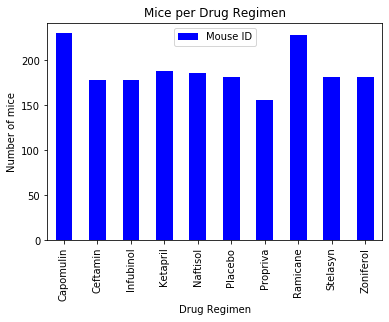

<Figure size 432x288 with 0 Axes>

In [91]:
# Use DataFrame.plot() in order to create a bar chart of the data
mice_perdrug.plot(kind="bar", color='b')

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.ylabel("Number of mice")

plt.show()
plt.tight_layout()

In [79]:
mice_per_regi2 = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug2 = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug2

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [74]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(mice_perdrug))
tick_locations = [value for value in x_axis]
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

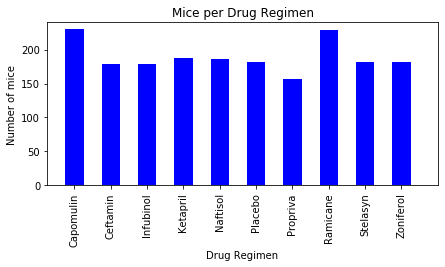

<Figure size 432x288 with 0 Axes>

In [123]:
# Create a list indicating where to write x labels
plt.figure(figsize=(7,3))
plt.bar(x_axis, mice_perdrug2["Mouse ID"], color='b', alpha=1, width=.5, align="center")
plt.xticks(tick_locations, mice_perdrug2["Drug Regimen"], rotation="vertical")

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_perdrug["Mouse ID"])+10)

plt.show()
plt.tight_layout()

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
all_mice = combined_data_df.drop_duplicates(subset='Mouse ID', keep='first')
male_female = all_mice['Sex'].value_counts()
male_female

Male      125
Female    124
Name: Sex, dtype: int64

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male mice", "Female mice"]

# The values of each section of the pie chart
sizes = [125, 124]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

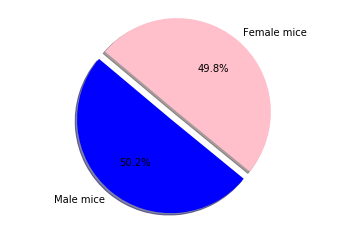

In [118]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [65]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
